### Introduction to Stats

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Measure of Central Tendancy

1. Mean
2. Median
3. Mode

In [2]:
ages = [23,24,32,45,12,43,67,45,32,56,32]

In [3]:
print(np.mean(ages))
print(np.median(ages))

37.36363636363637
32.0


In [4]:
import statistics 
statistics.mean(ages)

37.36363636363637

In [5]:
ages = [23,24,32,45,12,43,67,45,32,56,32,120]

print(np.mean(ages))
print(np.median(ages))

44.25
37.5


In [6]:
statistics.mode(ages) # Categorical features

32

<Axes: >

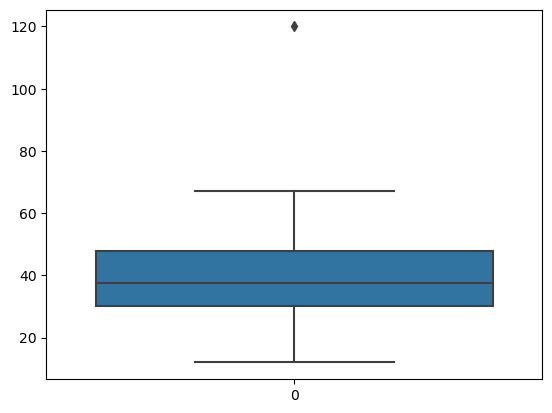

In [7]:
sns.boxplot(ages)

In [8]:
q1, q3 = np.percentile(ages,[25,75])
print(q1,q3)

30.0 47.75


In [9]:
IQR = q3 - q1
lower_fence = q1 - 1.5*(IQR)
higher_fence = q3 + 1.5*(IQR)

print(lower_fence,higher_fence)

3.375 74.375


### Measure of Dispersion

1. Variance 

2. Standard Deviation

In [10]:
statistics.variance(ages)

795.2954545454545

In [11]:
np.var(ages,axis=0)

729.0208333333334

In [12]:
# Sample variance
def variance(data):
  n=len(ages)
  ## mean of the data
  mean=sum(data)/n
  ## variance
  deviation=[(x - mean) ** 2 for x in data]
  variance=sum(deviation)/(n-1)
  return variance

variance(ages)

795.2954545454545

In [13]:
# Population variance
def variance(data):
  n=len(ages)
  ## mean of the data
  mean=sum(data)/n
  ## variance
  deviation=[(x - mean) ** 2 for x in data]
  variance=sum(deviation)/n 
  return variance

variance(ages)

729.0208333333334

In [39]:
np.sqrt(729)

27.0

* Population variance is the variance of the entire population (all data points).

* Sample variance is the variance of a subset (sample) of the population i.e divides by n−1 (sample size minus 1).


In [14]:
np.std(ages)

27.000385799712813

### Histogram and PDFs

<Axes: ylabel='Count'>

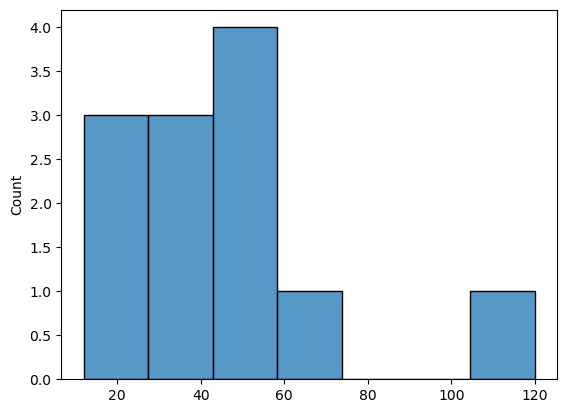

In [15]:
sns.histplot(ages)

<Axes: ylabel='Count'>

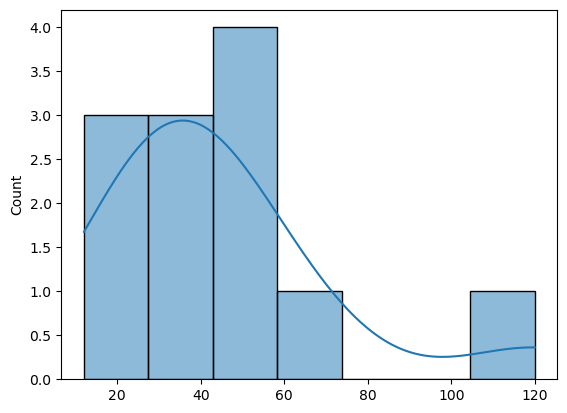

In [16]:
sns.histplot(ages, kde=True)

<Axes: ylabel='Count'>

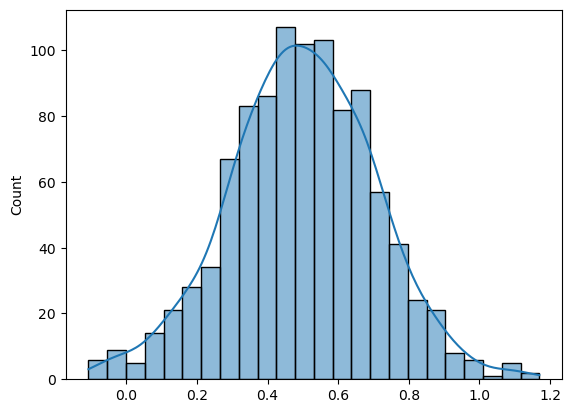

In [17]:
# Lets create a normal distribution data

s = np.random.normal(0.5,0.2,1000)

sns.histplot(s, kde=True)

In [18]:
s.shape

(1000,)

In [19]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
def plot_data(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(sample,dist='norm',plot=pylab)
    plt.show()

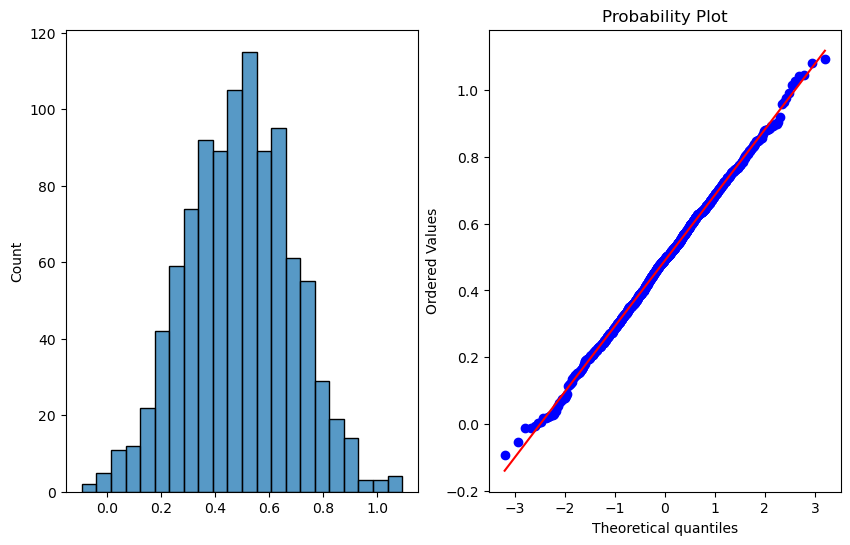

In [20]:
## create a normal distributed data
s=np.random.normal(0.5,0.2,1000)
plot_data(s)

In [21]:
# Pearson correlation

df = sns.load_dataset('tips')

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [22]:
corr_matrix = df.corr()

* 1 means a perfect positive correlation.
* -1 means a perfect negative correlation.
* 0 means no correlation.

In [23]:
corr_matrix

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


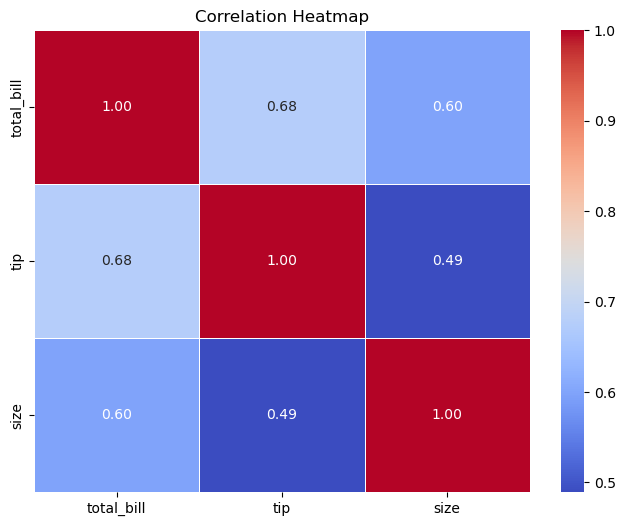

In [24]:
# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

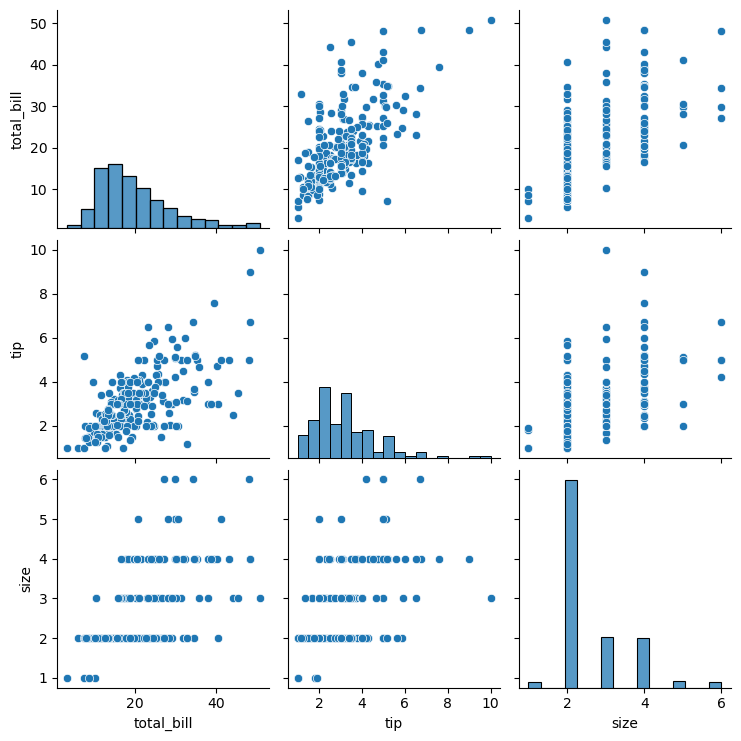

In [25]:
sns.pairplot(df)

### Random Variable

* Random variable follows a process of mapping the output of a random process of experiment to a number.

* Tossing a coin:
    Ex: X = { H --> 0 ,T --> 1 }
            
  * Here, Tossing a coin becomes our experiment          
            
  * With every time you flip the coin, the value of `X` changes as 0 or 1.
  
  * This process is where we map the output based on the experiment.

### PMF
*  The PMF provides the exact probability of that outcome occurring (for discrete random variable).

* Discrete random variable countable number of distinct values

In [28]:

data = {'Name': ['Jay', 'Samay', 'John', 'Lee'],
       'Salary': [12000, 15000, 11000, 15000]}

df = pd.DataFrame(data)
df

,Name,Salary
0,Jay,12000
1,Samay,15000
2,John,11000
3,Lee,15000


In [30]:
df['pmi'] = df['Salary'] / df['Salary'].sum()

df

,Name,Salary,pmi
0,Jay,12000,0.226415
1,Samay,15000,0.283019
2,John,11000,0.207547
3,Lee,15000,0.283019


To calculate the PMF (Probability Mass Function) for a discrete random variable, you use specific formulas depending on the type of distribution.

### Binomial PMF:

* Probability of getting a specific number of successes in a set number of trials.

**Question:** You are flipping a fair coin 10 times. What is the probability of getting exactly 5 heads?

In [32]:
from scipy.stats import binom, poisson

In [34]:
n, p = 10, 0.5  # 10 trials with a 50% chance of success
k = 5  # We're interested in exactly 5 successes
binom_pmf = binom.pmf(k, n, p)  # Probability of getting exactly 5 successes
print(f"Binomial PMF: {binom_pmf}")

Binomial PMF: 0.24609375000000003


* n: Number of trials (e.g., 10 coin flips).
* p: Probability of success on each trial (e.g., 0.5 for a fair coin).
* k: Number of successes we are interested in (e.g., 5 heads).

### Poisson PMF:
*  Probability of a specific number of events happening in a fixed interval, given the average rate of events.

**Question:**  A call center receives an average of 3 calls per hour. What is the probability that the call center will receive exactly 4 calls in the next hour?

In [37]:
lambda_ = 3  # Average number of events
k = 4  # We're interested in exactly 4 events
poisson_pmf = poisson.pmf(k, lambda_)  # Probability of exactly 4 events happening
print(f"Poission PMF: {poisson_pmf}")

Poission PMF: 0.16803135574154085


* lambda_: Average number of events in the interval (e.g., 3 events per hour).
* k: Number of events we are interested in (e.g., 4 events).